In [1]:
!nvidia-smi

Wed Jul 19 14:33:07 2023       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 536.23                 Driver Version: 536.23       CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                     TCC/WDDM  | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  NVIDIA GeForce RTX 3050 ...  WDDM  | 00000000:01:00.0 Off |                  N/A |
| N/A   51C    P0              12W /  49W |      0MiB /  4096MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [1]:
import tensorflow as tf
tf.config.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("HDFC.csv")

In [3]:
data.shape

(5306, 15)

In [4]:
data.head()

Date Symbol Series  Prev Close   Open    High    Low   Last   Close  \
0  2000-01-03   HDFC     EQ      271.75  293.5  293.50  293.5  293.5  293.50   
1  2000-01-04   HDFC     EQ      293.50  317.0  317.00  297.0  304.0  304.05   
2  2000-01-05   HDFC     EQ      304.05  290.0  303.90  285.0  295.0  292.80   
3  2000-01-06   HDFC     EQ      292.80  301.0  314.00  295.0  296.0  296.45   
4  2000-01-07   HDFC     EQ      296.45  290.0  296.35  281.0  287.1  286.55   

     VWAP  Volume      Turnover  Trades  Deliverable Volume  %Deliverble  
0  293.50   22744  6.675364e+11     NaN                 NaN          NaN  
1  303.62  255251  7.749972e+12     NaN                 NaN          NaN  
2  294.53  269087  7.925368e+12     NaN                 NaN          NaN  
3  300.14  305916  9.181669e+12     NaN                 NaN          NaN  
4  288.80  197039  5.690480e+12     NaN                 NaN          NaN

In [5]:
data.describe()

Prev Close         Open         High          Low         Last  \
count  5306.000000  5306.000000  5306.000000  5306.000000  5306.000000   
mean   1283.666114  1284.393074  1304.269732  1263.297842  1283.885017   
std     709.395090   709.703665   721.308080   697.450309   709.250204   
min     271.750000   284.000000   290.500000   273.250000   282.850000   
25%     668.650000   669.712500   677.512500   660.000000   669.000000   
50%    1136.275000  1135.400000  1156.725000  1119.000000  1135.000000   
75%    1811.475000  1813.812500  1835.000000  1783.075000  1812.000000   
max    3180.150000  3148.000000  3262.000000  3100.550000  3178.000000   

             Close         VWAP        Volume      Turnover         Trades  \
count  5306.000000  5306.000000  5.306000e+03  5.306000e+03    2456.000000   
mean   1284.071005  1283.664578  1.848187e+06  2.620759e+14  102159.051303   
std     709.430515   709.109622  2.991387e+06  3.607844e+14   57948.603200   
min     283.850000   283.600000  2.919000e+03  1.834686e+11     973.000000   
25%     668.662500   668.265000  3.034970e+05  2.461178e+13   62011.500000   
50%    1136.675000  1136.720000  1.337788e+06  1.684207e+14   90405.000000   
75%    1811.787500  1811.680000  2.732310e+06  3.419282e+14  129754.500000   
max    3180.150000  3166.580000  1.584141e+08  1.043773e+16  538170.000000   

       Deliverable Volume  %Deliverble  
count        4.797000e+03  4797.000000  
mean         1.329440e+06     0.653088  
std          2.555073e+06     0.128115  
min          1.786000e+03     0.119000  
25%          2.688070e+05     0.575200  
50%          1.021574e+06     0.666900  
75%          1.939101e+06     0.742000  
max          1.483131e+08     0.989400

In [6]:
data.isna().sum()

Date                     0
Symbol                   0
Series                   0
Prev Close               0
Open                     0
High                     0
Low                      0
Last                     0
Close                    0
VWAP                     0
Volume                   0
Turnover                 0
Trades                2850
Deliverable Volume     509
%Deliverble            509
dtype: int64

In [7]:
n_data = data.reset_index()["Close"]
n_data

0        293.50
1        304.05
2        292.80
3        296.45
4        286.55
         ...   
5301    2509.80
5302    2518.40
5303    2577.00
5304    2538.85
5305    2420.10
Name: Close, Length: 5306, dtype: float64

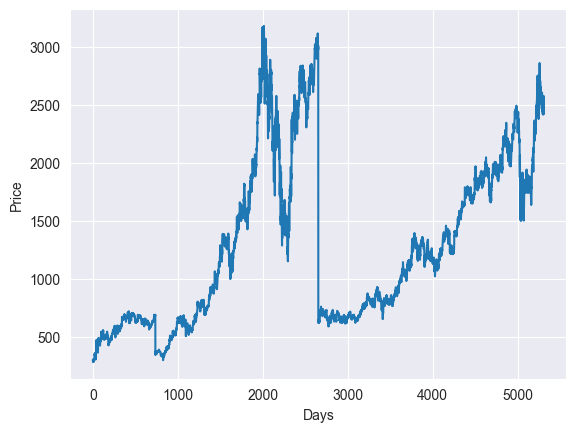

In [8]:
plt.xlabel("Days"), plt.ylabel("Price")
plt.plot(n_data)

In [9]:
data[data["Trades"].isna()]

Date Symbol Series  Prev Close   Open    High    Low    Last  \
0     2000-01-03   HDFC     EQ      271.75  293.5  293.50  293.5  293.50   
1     2000-01-04   HDFC     EQ      293.50  317.0  317.00  297.0  304.00   
2     2000-01-05   HDFC     EQ      304.05  290.0  303.90  285.0  295.00   
3     2000-01-06   HDFC     EQ      292.80  301.0  314.00  295.0  296.00   
4     2000-01-07   HDFC     EQ      296.45  290.0  296.35  281.0  287.10   
...          ...    ...    ...         ...    ...     ...    ...     ...   
2845  2011-05-25   HDFC     EQ      649.40  650.0  656.50  641.1  644.00   
2846  2011-05-26   HDFC     EQ      644.25  645.2  649.90  635.0  642.50   
2847  2011-05-27   HDFC     EQ      643.15  640.5  658.40  640.5  656.60   
2848  2011-05-30   HDFC     EQ      656.30  658.0  671.50  658.0  667.30   
2849  2011-05-31   HDFC     EQ      668.55  669.8  688.80  669.8  684.75   

       Close    VWAP   Volume      Turnover  Trades  Deliverable Volume  \
0     293.50  293.50    22744  6.675364e+11     NaN                 NaN   
1     304.05  303.62   255251  7.749972e+12     NaN                 NaN   
2     292.80  294.53   269087  7.925368e+12     NaN                 NaN   
3     296.45  300.14   305916  9.181669e+12     NaN                 NaN   
4     286.55  288.80   197039  5.690480e+12     NaN                 NaN   
...      ...     ...      ...           ...     ...                 ...   
2845  644.25  648.52  2245849  1.456487e+14     NaN           1134361.0   
2846  643.15  642.57  2913164  1.871921e+14     NaN           1531640.0   
2847  656.30  653.08  1935462  1.264017e+14     NaN           1152957.0   
2848  668.55  666.15  2256839  1.503383e+14     NaN           1459871.0   
2849  684.05  680.72  3227566  2.197062e+14     NaN           2423589.0   

      %Deliverble  
0             NaN  
1             NaN  
2             NaN  
3             NaN  
4             NaN  
...           ...  
2845       0.5051  
2846       0.5258  
2847       0.5957  
2848       0.6469  
2849       0.7509  

[2850 rows x 15 columns]

In [10]:
d_data = data.drop(columns=["Date", "Symbol", "Series", "Turnover"])

In [11]:
d_data.corr()

Prev Close      Open      High       Low      Last  \
Prev Close            1.000000  0.998656  0.998095  0.998008  0.997662   
Open                  0.998656  1.000000  0.999306  0.999326  0.998897   
High                  0.998095  0.999306  1.000000  0.998895  0.999428   
Low                   0.998008  0.999326  0.998895  1.000000  0.999365   
Last                  0.997662  0.998897  0.999428  0.999365  1.000000   
Close                 0.997699  0.998928  0.999466  0.999403  0.999960   
VWAP                  0.998143  0.999405  0.999656  0.999632  0.999789   
Volume                0.117363  0.116958  0.117639  0.116228  0.117330   
Trades                0.560553  0.560402  0.570908  0.551610  0.561253   
Deliverable Volume    0.013616  0.013044  0.012909  0.012512  0.012929   
%Deliverble          -0.317706 -0.317771 -0.321784 -0.314812 -0.319023   

                       Close      VWAP    Volume    Trades  \
Prev Close          0.997699  0.998143  0.117363  0.560553   
Open                0.998928  0.999405  0.116958  0.560402   
High                0.999466  0.999656  0.117639  0.570908   
Low                 0.999403  0.999632  0.116228  0.551610   
Last                0.999960  0.999789  0.117330  0.561253   
Close               1.000000  0.999826  0.117280  0.560705   
VWAP                0.999826  1.000000  0.117080  0.561442   
Volume              0.117280  0.117080  1.000000  0.384571   
Trades              0.560705  0.561442  0.384571  1.000000   
Deliverable Volume  0.012939  0.012717  0.973612  0.233062   
%Deliverble        -0.318815 -0.318815  0.011749 -0.264061   

                    Deliverable Volume  %Deliverble  
Prev Close                    0.013616    -0.317706  
Open                          0.013044    -0.317771  
High                          0.012909    -0.321784  
Low                           0.012512    -0.314812  
Last                          0.012929    -0.319023  
Close                         0.012939    -0.318815  
VWAP                          0.012717    -0.318815  
Volume                        0.973612     0.011749  
Trades                        0.233062    -0.264061  
Deliverable Volume            1.000000     0.111849  
%Deliverble                   0.111849     1.000000

Handling NaN values

In [12]:
d_data["Trades"] = d_data["Trades"].replace(np.nan, d_data["Trades"].mean())
d_data["Deliverable Volume"] = d_data["Deliverable Volume"].replace(np.nan, d_data["Trades"].mean())
d_data["%Deliverble"] = d_data["%Deliverble"].replace(np.nan, d_data["Trades"].mean())
d_data

Prev Close     Open     High      Low     Last    Close     VWAP  \
0         271.75   293.50   293.50   293.50   293.50   293.50   293.50   
1         293.50   317.00   317.00   297.00   304.00   304.05   303.62   
2         304.05   290.00   303.90   285.00   295.00   292.80   294.53   
3         292.80   301.00   314.00   295.00   296.00   296.45   300.14   
4         296.45   290.00   296.35   281.00   287.10   286.55   288.80   
...          ...      ...      ...      ...      ...      ...      ...   
5301     2497.35  2500.00  2534.10  2483.20  2502.00  2509.80  2508.07   
5302     2509.80  2494.15  2526.80  2486.25  2514.00  2518.40  2509.18   
5303     2518.40  2516.10  2609.00  2508.30  2575.00  2577.00  2574.21   
5304     2577.00  2590.90  2628.00  2533.00  2539.70  2538.85  2569.65   
5305     2538.85  2503.10  2525.00  2411.10  2433.25  2420.10  2445.94   

       Volume         Trades  Deliverable Volume    %Deliverble  
0       22744  102159.051303        1.021591e+05  102159.051303  
1      255251  102159.051303        1.021591e+05  102159.051303  
2      269087  102159.051303        1.021591e+05  102159.051303  
3      305916  102159.051303        1.021591e+05  102159.051303  
4      197039  102159.051303        1.021591e+05  102159.051303  
...       ...            ...                 ...            ...  
5301  3916088  121028.000000        2.440395e+06       0.623200  
5302  2040799  102250.000000        1.040749e+06       0.510000  
5303  3407461  117425.000000        1.815110e+06       0.532700  
5304  3005468  132826.000000        1.472924e+06       0.490100  
5305  6024595  224454.000000        3.839105e+06       0.637200  

[5306 rows x 11 columns]

Scaling Data

In [42]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(d_data)
s_data = scaler.transform(d_data)
data = pd.DataFrame(s_data, columns=d_data.columns)

Handling Highly Correlated Values

In [43]:
data

Prev Close      Open      High       Low      Last     Close      VWAP  \
0       0.000000  0.004520  0.001413  0.009776  0.005070  0.004596  0.004715   
1       0.010303  0.015700  0.012481  0.011466  0.010068  0.009621  0.009534   
2       0.015300  0.002855  0.006311  0.005673  0.005784  0.004263  0.005205   
3       0.009971  0.008088  0.011068  0.010500  0.006260  0.006001  0.007877   
4       0.011700  0.002855  0.002755  0.003741  0.002023  0.001286  0.002476   
...          ...       ...       ...       ...       ...       ...       ...   
5301    1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
5302    1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
5303    1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
5304    1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
5305    1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   

        Volume    Trades  Deliverable Volume  %Deliverble  
0     0.005027  0.833333            0.037873     1.000000  
1     0.063982  0.833333            0.037873     1.000000  
2     0.067490  0.833333            0.037873     1.000000  
3     0.076829  0.833333            0.037873     1.000000  
4     0.049222  0.833333            0.037873     1.000000  
...        ...       ...                 ...          ...  
5301  0.992234  1.000000            0.920136     0.567076  
5302  0.516730  0.838210            0.392021     0.361304  
5303  0.863265  1.000000            0.684203     0.402568  
5304  0.761335  1.000000            0.555090     0.325131  
5305  1.000000  1.000000            1.000000     0.592524  

[5306 rows x 11 columns]

<Axes: >

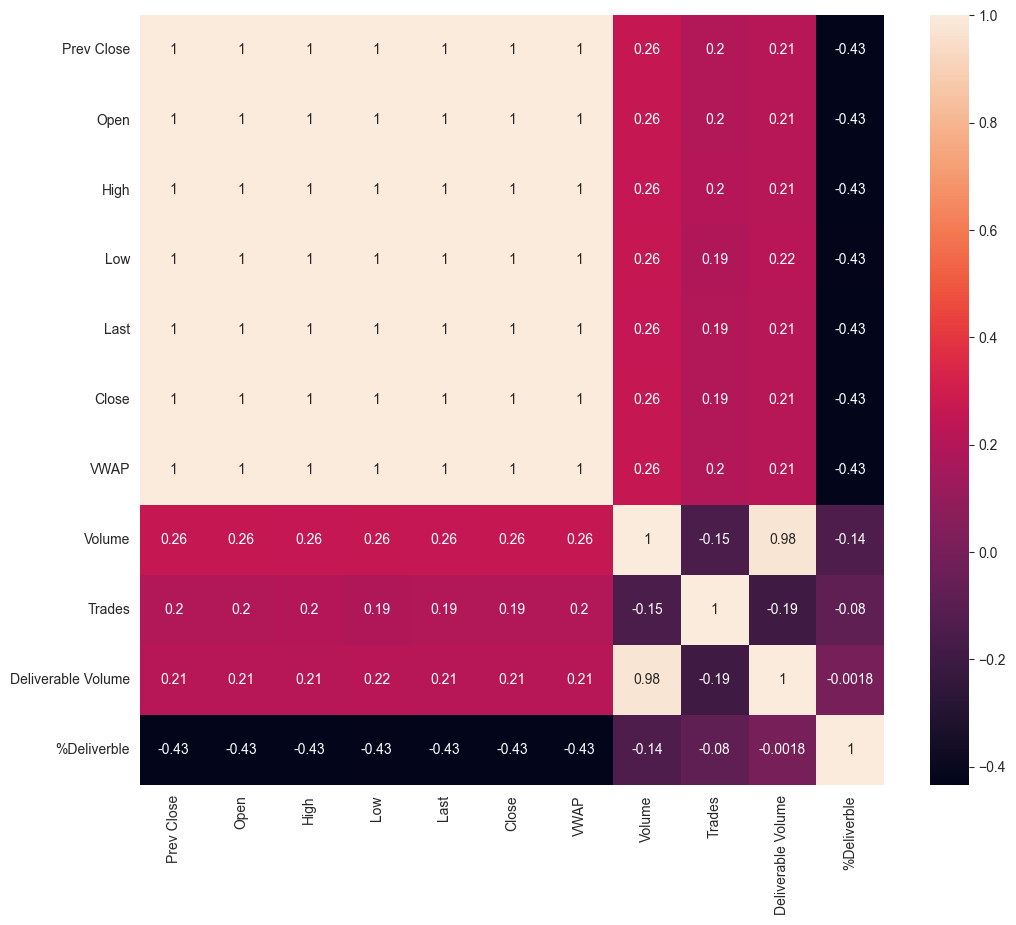

In [44]:
import seaborn as sns
plt.figure(figsize=(12,10))
cor = data.corr()
sns.heatmap(cor, annot=True)

Outlier Removal

Prev Close               Axes(0.125,0.747241;0.227941x0.132759)
Open                  Axes(0.398529,0.747241;0.227941x0.132759)
High                  Axes(0.672059,0.747241;0.227941x0.132759)
Low                      Axes(0.125,0.587931;0.227941x0.132759)
Last                  Axes(0.398529,0.587931;0.227941x0.132759)
Close                 Axes(0.672059,0.587931;0.227941x0.132759)
VWAP                     Axes(0.125,0.428621;0.227941x0.132759)
Volume                Axes(0.398529,0.428621;0.227941x0.132759)
Trades                Axes(0.672059,0.428621;0.227941x0.132759)
Deliverable Volume        Axes(0.125,0.26931;0.227941x0.132759)
%Deliverble            Axes(0.398529,0.26931;0.227941x0.132759)
dtype: object

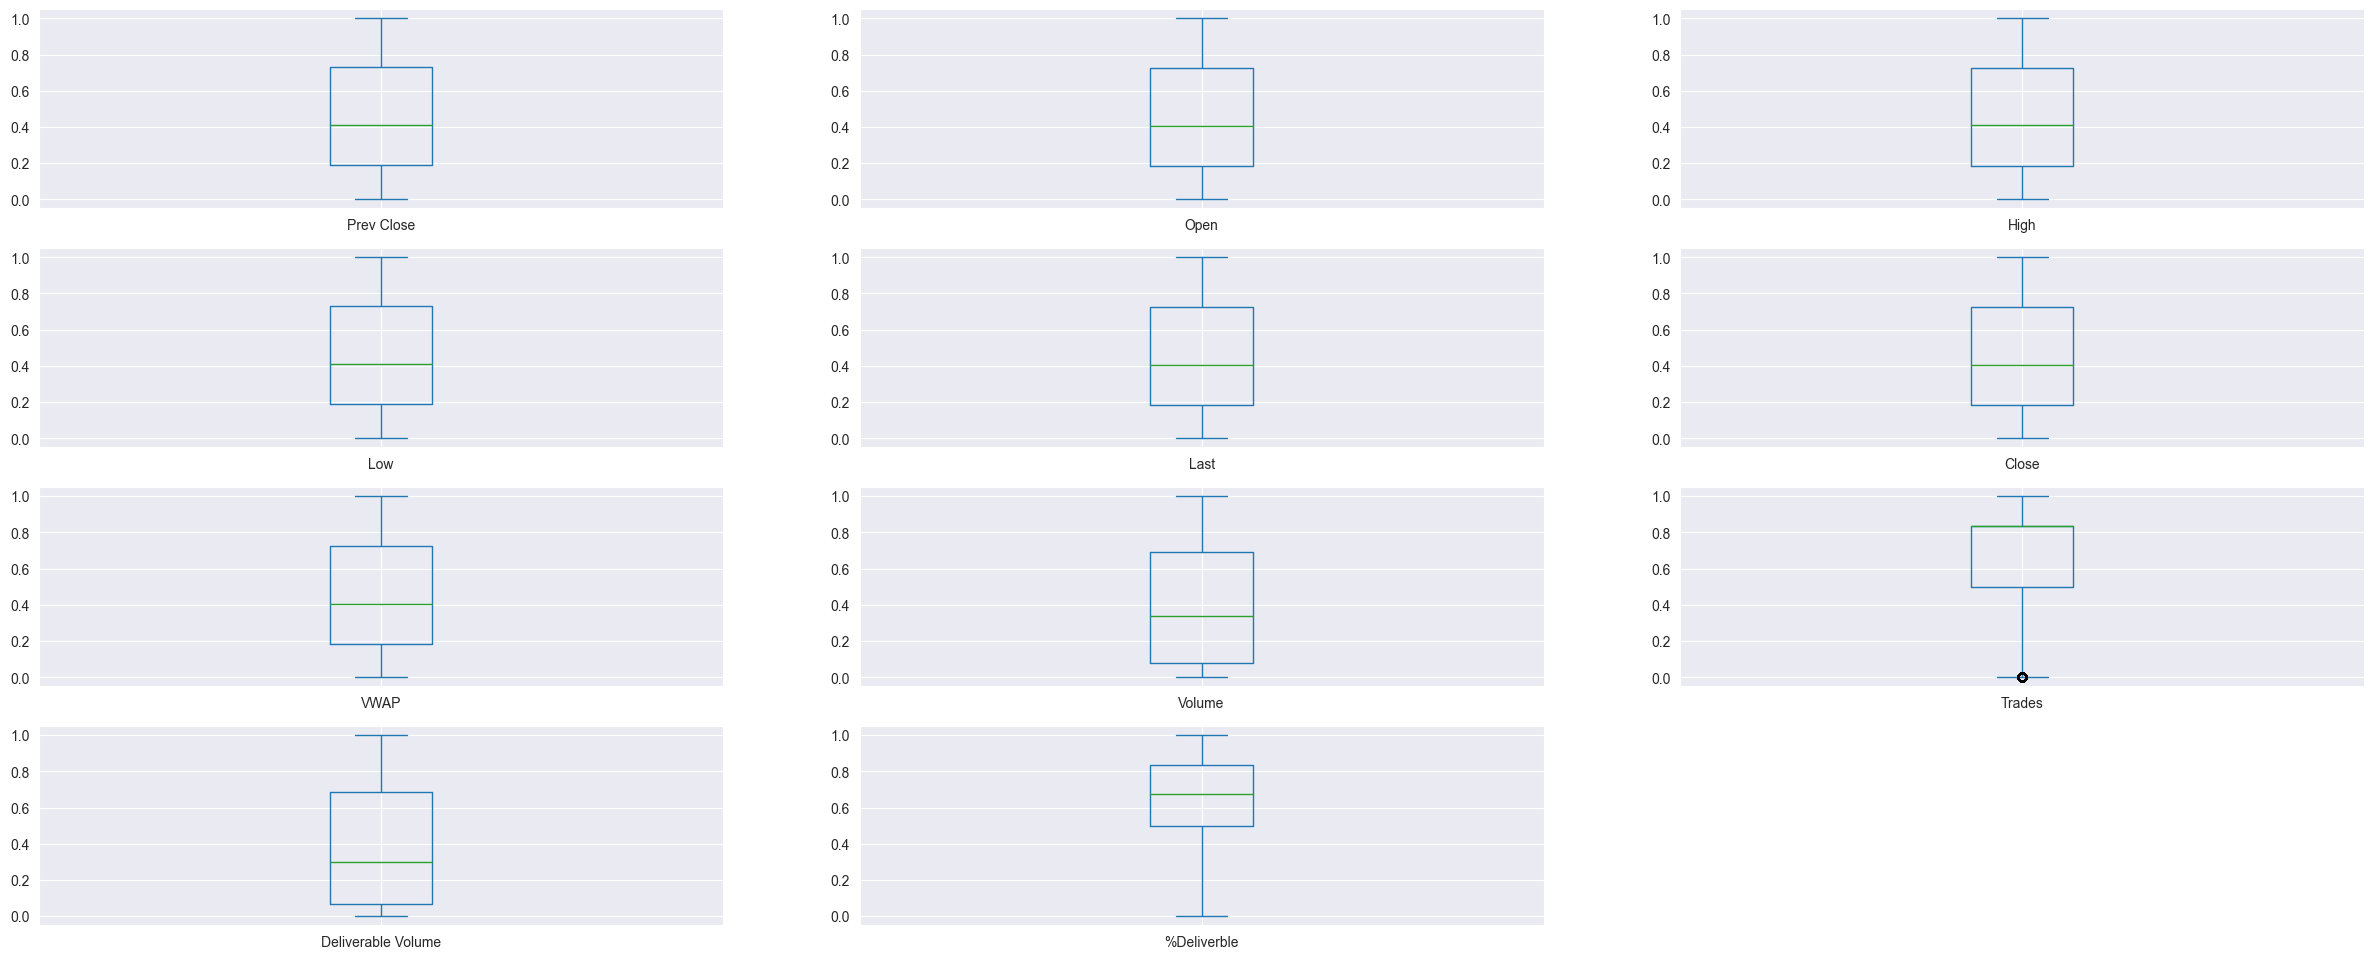

In [45]:
data.plot(kind= 'box' , subplots=True, layout=(5, 3), sharex=False, sharey=False, figsize=(30,15))

In [46]:
def outlier_removal(data_frame, copy=False):
    #Tukey Fences
    for col in data_frame.columns:
        Q1 = data_frame[col].quantile(0.25)
        Q3 = data_frame[col].quantile(0.75)

        k = 1.5
        up_lt, low_lt = (Q1 + k*(Q3- Q1)), (Q1 - k*(Q3 - Q1))

        data_frame[col] = np.where(data_frame[col] > up_lt, up_lt,
                                   np.where(data_frame[col] < low_lt, low_lt, data_frame[col]))
        
        print(col + " done")
        
    return data_frame

In [47]:
data = outlier_removal(data)

Prev Close done
Open done
High done
Low done
Last done
Close done
VWAP done
Volume done
Trades done
Deliverable Volume done
%Deliverble done


Prev Close               Axes(0.125,0.747241;0.227941x0.132759)
Open                  Axes(0.398529,0.747241;0.227941x0.132759)
High                  Axes(0.672059,0.747241;0.227941x0.132759)
Low                      Axes(0.125,0.587931;0.227941x0.132759)
Last                  Axes(0.398529,0.587931;0.227941x0.132759)
Close                 Axes(0.672059,0.587931;0.227941x0.132759)
VWAP                     Axes(0.125,0.428621;0.227941x0.132759)
Volume                Axes(0.398529,0.428621;0.227941x0.132759)
Trades                Axes(0.672059,0.428621;0.227941x0.132759)
Deliverable Volume        Axes(0.125,0.26931;0.227941x0.132759)
%Deliverble            Axes(0.398529,0.26931;0.227941x0.132759)
dtype: object

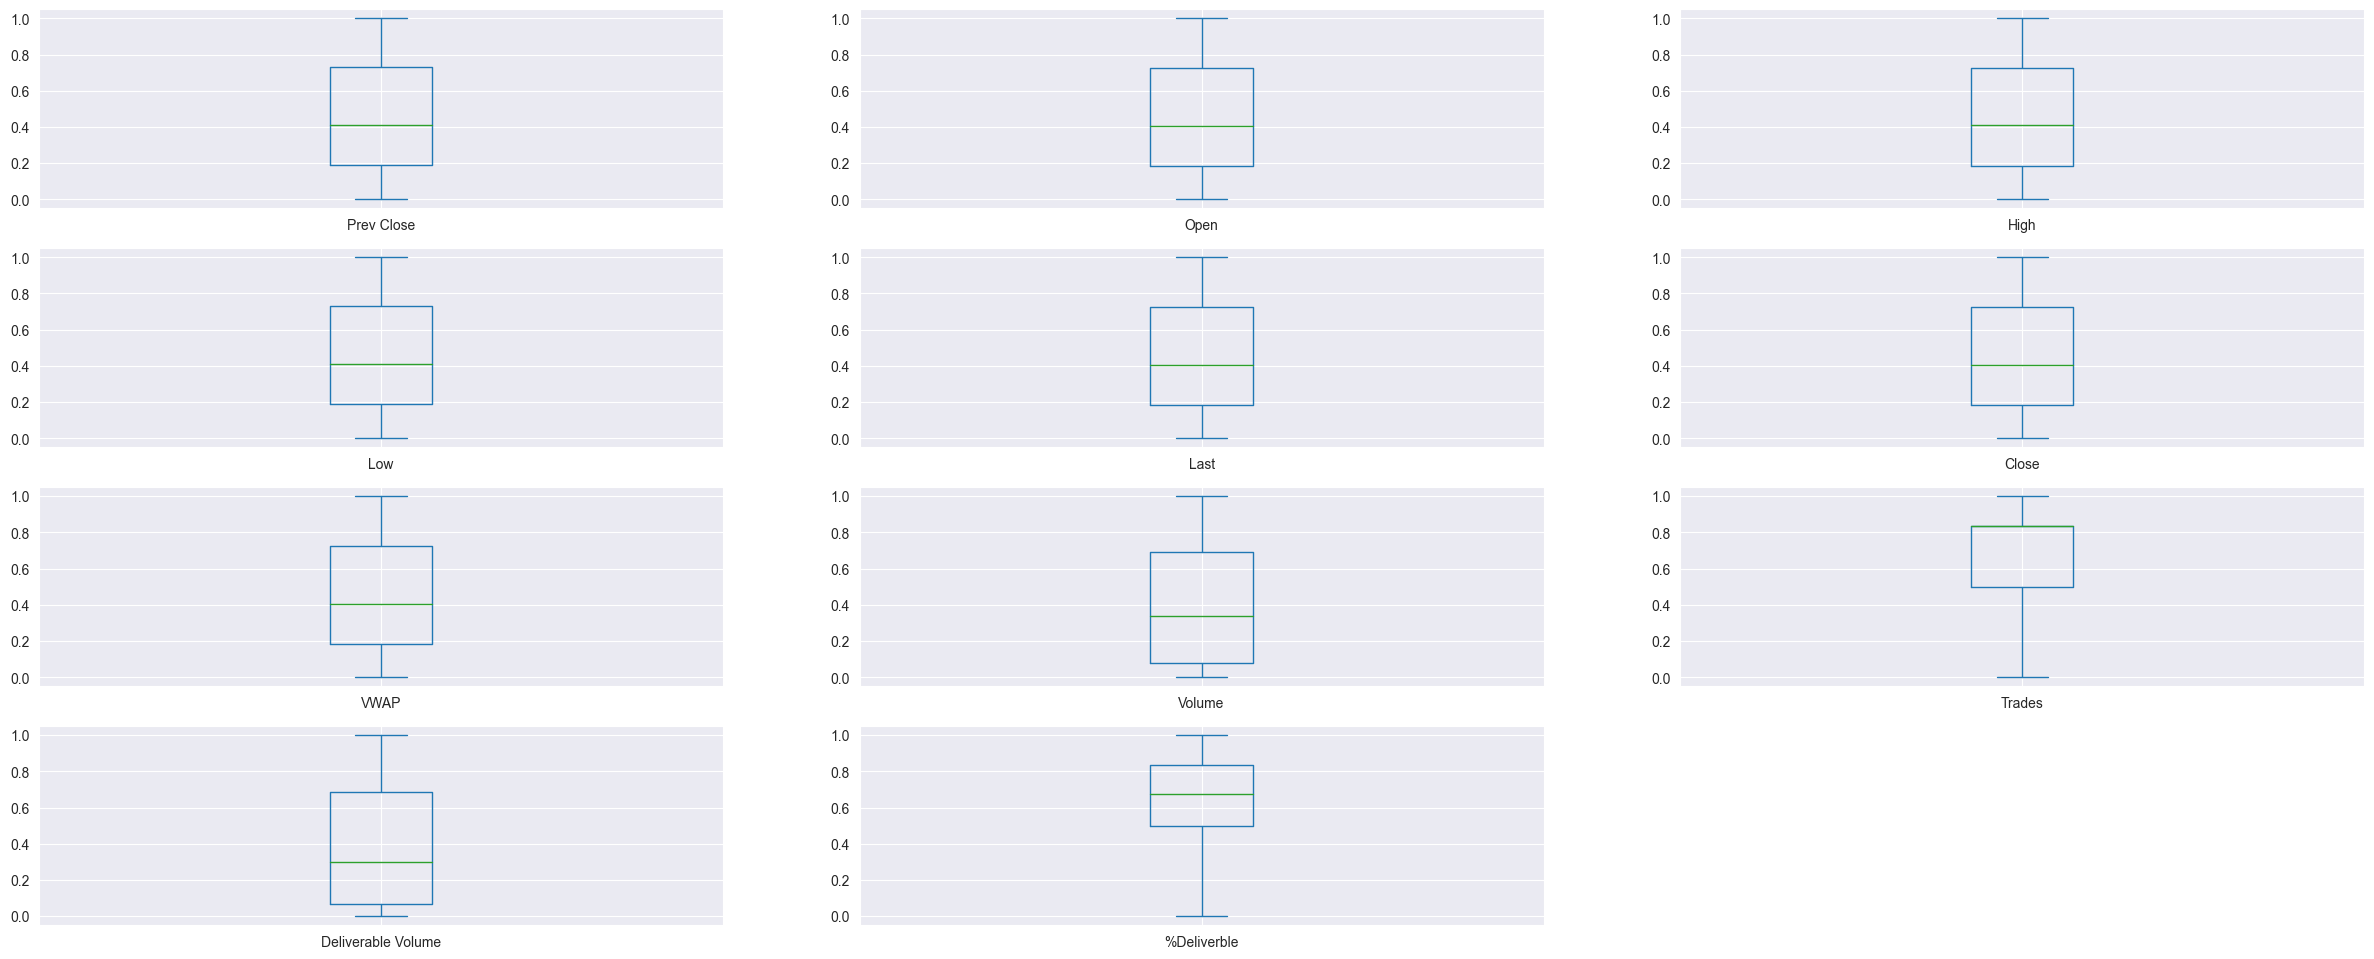

In [48]:
data.plot(kind= 'box' , subplots=True, layout=(5, 3), sharex=False, sharey=False, figsize=(30,15))

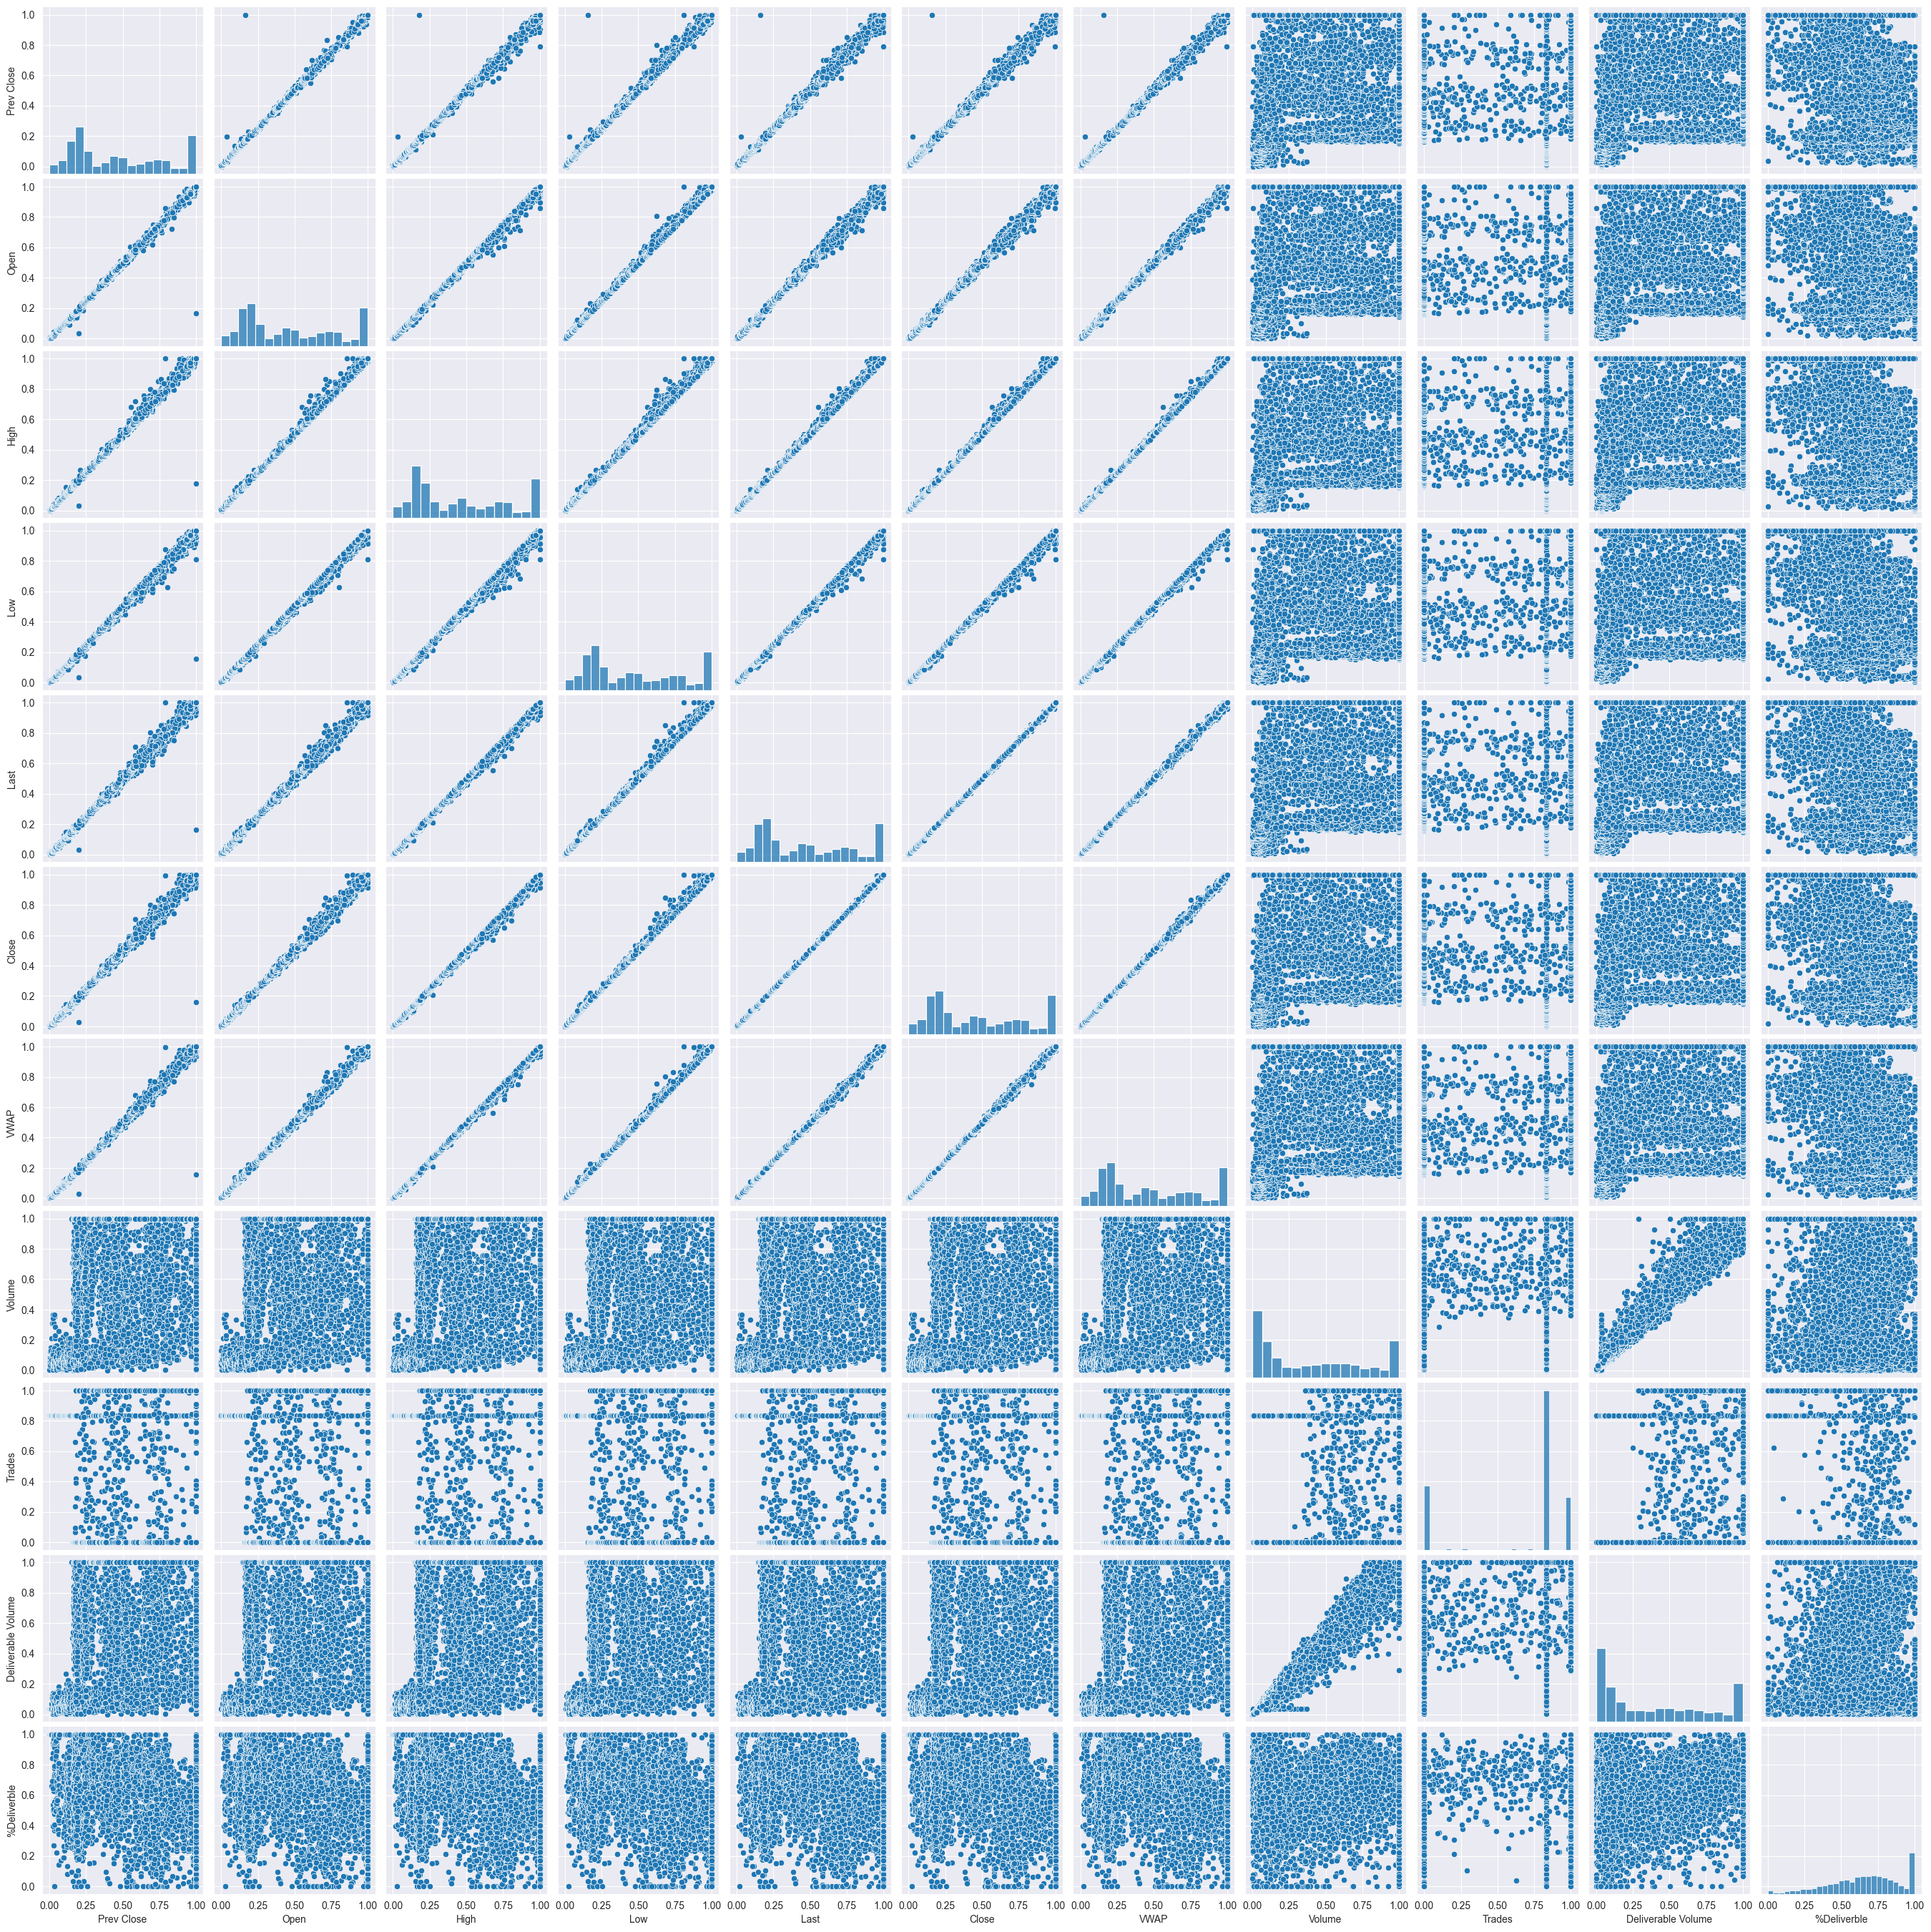

In [49]:
sns.pairplot(data, diag_kind='hist')

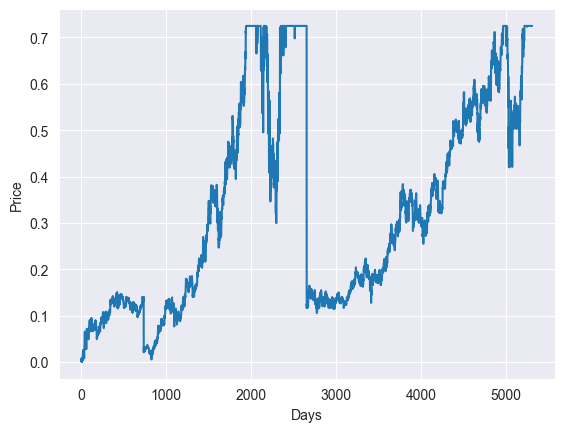

In [23]:
temp = data.reset_index()["Close"]
plt.xlabel("Days"), plt.ylabel("Price")
plt.plot(temp)

In [25]:
X, y = data.drop("Close", axis=1), data["Close"]
X

Prev Close      Open      High       Low      Last      VWAP    Volume  \
0       0.000000  0.003317  0.001010  0.007162  0.003679  0.003434  0.000125   
1       0.007478  0.011522  0.008918  0.008400  0.007305  0.006944  0.001593   
2       0.011106  0.002095  0.004510  0.004156  0.004197  0.003791  0.001680   
3       0.007238  0.005936  0.007908  0.007693  0.004542  0.005737  0.001913   
4       0.008493  0.002095  0.001969  0.002741  0.001468  0.001804  0.001225   
...          ...       ...       ...       ...       ...       ...       ...   
5301    0.725876  0.733891  0.714536  0.732629  0.725576  0.728339  0.024703   
5302    0.725876  0.733891  0.714536  0.732629  0.725576  0.728339  0.012864   
5303    0.725876  0.733891  0.714536  0.732629  0.725576  0.728339  0.021492   
5304    0.725876  0.733891  0.714536  0.732629  0.725576  0.728339  0.018954   
5305    0.725876  0.733891  0.714536  0.732629  0.725576  0.728339  0.024896   

        Trades  Deliverable Volume  %Deliverble  
0     0.188359            0.000677     0.000007  
1     0.188359            0.000677     0.000007  
2     0.188359            0.000677     0.000007  
3     0.188359            0.000677     0.000007  
4     0.188359            0.000677     0.000007  
...        ...                 ...          ...  
5301  0.194146            0.016443     0.000005  
5302  0.188529            0.007005     0.000004  
5303  0.194146            0.012226     0.000004  
5304  0.194146            0.009919     0.000004  
5305  0.194146            0.017870     0.000005  

[5306 rows x 10 columns]

In [26]:
num = 4000
X_train, X_test, y_train, y_test = X[:num], X[num:], y[:num], y[num:]

In [27]:
X_test.shape

(1306, 10)

In [28]:
import tensorflow as tf
from tensorflow import keras
from keras import layers
from keras import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import Dropout

In [29]:
def make_model(hp):
    model = Sequential()

    for _ in range(hp.Int("layers", 1, 10, step=1)):
        model.add(LSTM(units = hp.Int("units", 10, 100, step=10), return_sequences = True, input_shape = (10, 1)))
        model.add(Dropout(hp.Float("dropout", 0, 0.2, step=0.1)))

    model.add(Dense(units = 1, activation="linear"))

    model.compile(loss='mean_squared_error', 
                  optimizer=keras.optimizers.Adam(hp.Choice('learning_rate', [1e-2, 1e-3, 1e-4])), 
                  metrics=["MSE", "MAE", "accuracy"])

    return model

In [30]:
import keras_tuner as kt
tuner = kt.Hyperband(make_model,
                         objective=kt.Objective('MSE', direction='min'),
                         executions_per_trial=2,
                         overwrite=True,
                         max_retries_per_trial=2,
                         max_epochs=10,
                         project_name="Correlated_val")

tuner.search(X_train, y_train, epochs=10, validation_split=0.2, batch_size=1024)

Trial 30 Complete [00h 00m 11s]
MSE: 0.00830620527267456

Best MSE So Far: 0.005905509926378727
Total elapsed time: 00h 08m 52s
INFO:tensorflow:Oracle triggered exit


In [31]:
import json
best_hps = tuner.get_best_hyperparameters()[0].values
with open(r"tmp/Correlated_tuned_vals.json", 'w') as f:
    json.dump(best_hps, f)
print(best_hps)

{'layers': 1, 'units': 60, 'dropout': 0.1, 'learning_rate': 0.01, 'tuner/epochs': 10, 'tuner/initial_epoch': 4, 'tuner/bracket': 2, 'tuner/round': 2, 'tuner/trial_id': '0012'}


In [32]:
model = tuner.get_best_models(num_models=1)[0]

Training Best Model

In [34]:
with tf.device("GPU"):
    model.fit(X_train, y_train, batch_size=128, epochs=5)

Epoch 1/5
32/32 [==============================] - 0s 10ms/step - loss: 6.9116e-04 - MSE: 6.9116e-04 - MAE: 0.0187 - accuracy: 5.0000e-04
Epoch 2/5
32/32 [==============================] - 0s 11ms/step - loss: 6.2644e-04 - MSE: 6.2644e-04 - MAE: 0.0176 - accuracy: 5.0000e-04
Epoch 3/5
32/32 [==============================] - 0s 10ms/step - loss: 5.3500e-04 - MSE: 5.3500e-04 - MAE: 0.0160 - accuracy: 5.0000e-04
Epoch 4/5
32/32 [==============================] - 0s 10ms/step - loss: 4.5330e-04 - MSE: 4.5330e-04 - MAE: 0.0145 - accuracy: 5.0000e-04
Epoch 5/5
32/32 [==============================] - 0s 10ms/step - loss: 4.4744e-04 - MSE: 4.4744e-04 - MAE: 0.0142 - accuracy: 5.0000e-04


In [35]:
model.save("Stock_model.h5")

In [36]:
model = tf.keras.models.load_model("Stock_model.h5")

In [37]:
y_pred = model.predict(X_test)

41/41 [==============================] - 0s 2ms/step


In [38]:
try:
    y_test = y_test.to_numpy()
except AttributeError:
    pass
y_test, y_test.shape

(array([0.30008977, 0.29444464, 0.2925284 , ..., 0.72489038, 0.72489038,
        0.72489038]),
 (1306,))

In [39]:
y_pred = np.squeeze(y_pred)
y_pred = np.array([np.max(lst) for lst in y_pred], dtype="float")
y_pred

array([0.31376642, 0.31538269, 0.31077951, ..., 0.74572587, 0.74523711,
       0.74662572])

In [40]:
len([x for x in range(y.shape[0] - len(y_pred), y.shape[0])])

1306

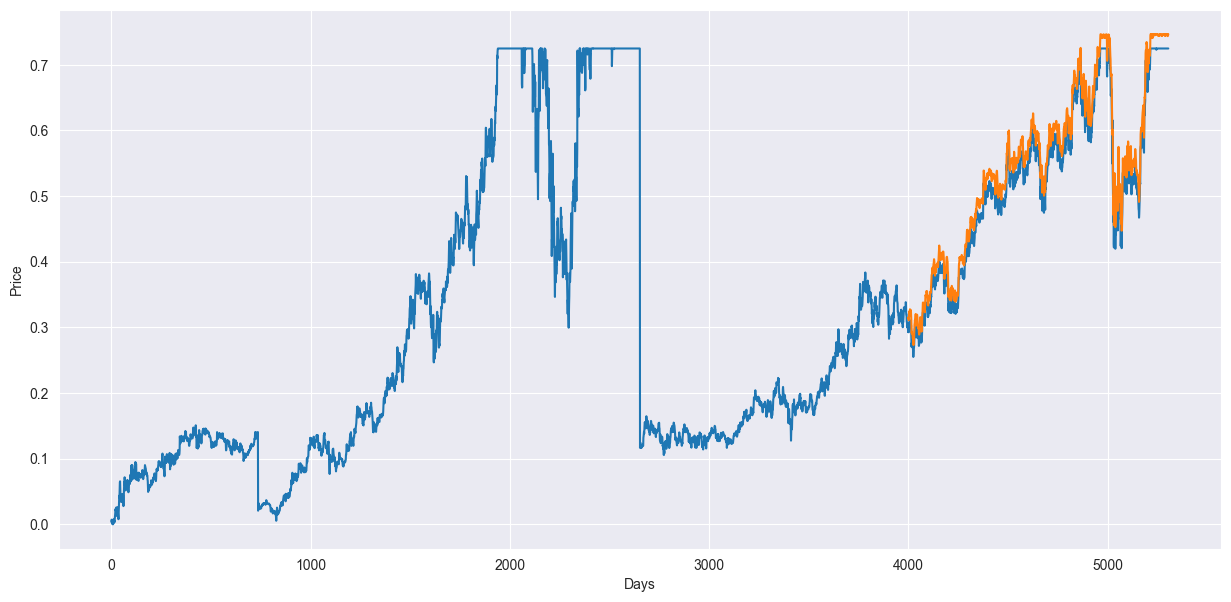

In [41]:
plt.rcParams['figure.figsize'] = [15, 7]
plt.xlabel("Days")
plt.ylabel("Price")
plt.plot([x for x in range(y.shape[0])], y)
plt.plot([x for x in range(y.shape[0] - len(y_pred), y.shape[0])], y_pred)